In [1]:
import yaml
from molecular_gnn import augm, mol2graph
import numpy as np

config = yaml.safe_load(open("configs/test.yaml", mode="r"))
augmentation = True
computable_atoms = config["computable_atoms"]
chirality = config["chirality"]
stereochemistry = config["stereochemistry"]

smiles = np.array(["CCCC", "c1ccccc1CC", "CCC[C@@H](O)CC\C=C\C=C\C#CC#C\C=C\CO"])
y = np.array([100, 200, 300])


smiles, enum_card_train, y = augm.augment_data(
    smiles, y, augmentation, max_n_augm=10
)
smiles

['CCCC',
 'C(CC)C',
 'C(C)CC',
 'c1ccccc1CC',
 'c1cccc(CC)c1',
 'c1ccc(CC)cc1',
 'c1cc(CC)ccc1',
 'c1c(CC)cccc1',
 'c1(CC)ccccc1',
 'C(C)c1ccccc1',
 'CCc1ccccc1',
 'C(\\C#CC#C/C=C/CO)=C/C=C/CC[C@@H](CCC)O',
 'C(\\CO)=C/C#CC#C/C=C/C=C/CC[C@@H](CCC)O',
 '[C@H](O)(CC/C=C/C=C/C#CC#C/C=C/CO)CCC',
 'C(=C/CO)\\C#CC#C/C=C/C=C/CC[C@@H](CCC)O',
 'CCC[C@@H](O)CC/C=C/C=C/C#CC#C/C=C/CO',
 'O[C@@H](CC/C=C/C=C/C#CC#C/C=C/CO)CCC',
 'C(/C=C/C=C/C#CC#C/C=C/CO)C[C@@H](CCC)O',
 'C(O)/C=C/C#CC#C/C=C/C=C/CC[C@@H](CCC)O',
 'C(/C=C/CO)#CC#C/C=C/C=C/CC[C@@H](CCC)O',
 'C([C@@H](O)CC/C=C/C=C/C#CC#C/C=C/CO)CC']

In [9]:
from rdkit import Chem
from ctypes import ArgumentError

mol = Chem.MolFromSmiles("test")
try:
    a = Chem.MolToSmiles(mol)
except ArgumentError:
    print("Don't mind.")

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(class RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(class RDKit::ROMol mol, struct RDKit::SmilesWriteParams params)

In [6]:
type(None)

NoneType

In [2]:
from molecular_gnn import mol2graph

test = mol2graph.Mol2Graph(
    computable_atoms=["C", "O", "S", "N", "Si", "F", "Cl", "Br", "I", "P", "B"],
    poly_flag=True
)
n_node, n_edge = test.get_graph_features()
print(n_node, n_edge)
vector = test.calc_graph_vector("*CCC*", 0.12, n_node, n_edge)
vector.x

45 6


tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000, -0.0931,  0.0000,  0.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0103,  1.7000,  0.7600,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,

In [3]:
def mol_with_atom_index(mol, highlight_idx=[]):
    atoms = mol.GetNumAtoms()
    for idx in range(atoms):
        mol.GetAtomWithIdx(idx).SetProp(
            'molAtomMapNumber', str(mol.GetAtomWithIdx(idx).GetIdx())
        )
        mol.__sssAtoms = highlight_idx
    return mol

{0, 1, 2, 3, 6, 15, 16, 17, 18, 19, 20, 27, 28, 29, 30}
{(0, 30), (30, 0)}


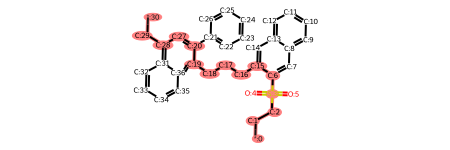

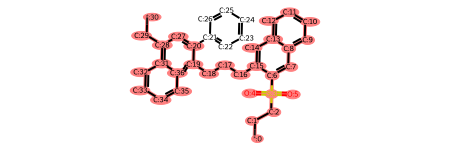

In [4]:
from rdkit import Chem
from molecular_gnn import mol2graph
from rdkit.Chem import rdmolops
import itertools

graph = mol2graph.Mol2Graph(
    computable_atoms=["C", "O", "S", "N", "Si", "F", "Cl", "Br", "I", "P", "B"],
    poly_flag=True
)
test = "*CCS(=O)(=O)c2cc1ccccc1cc2CCCc4c(c3ccccc3)cc(C*)c5ccccc45"
mol = Chem.MolFromSmiles(test)
poly_idx = graph.search_poly_bond(mol)
path = set(rdmolops.GetShortestPath(mol, poly_idx[0], poly_idx[1]))
print(path)
ssr = Chem.GetSymmSSSR(mol)
a = itertools.permutations(poly_idx, 2)
print(set(a))
display(mol_with_atom_index(mol, path))

mol = graph.set_chain_type(mol, poly_idx)
highlight = []
for i in range(mol.GetNumAtoms()):
    atom = mol.GetAtomWithIdx(i)
    if atom.GetProp("chain_type") == "main_chain":
        highlight.append(i)

mol_with_atom_index(mol, highlight)